importing the  cdsapi for helping us in downloading the rainfall data from the climate data store 

In [294]:
import cdsapi

In [295]:
# import cdsapi

# dataset = "reanalysis-era5-single-levels"
# request = {
#     "product_type": ["reanalysis"],
#     "variable": ["total_precipitation"],
#     "year": ["2024"],
#     "month": [
#         "01", "02", "03",
#         "04", "05", "06",
#         "07", "08", "09",
#         "10", "11", "12"
#     ],
#     "day": [
#         "01", "02", "03",
#         "04", "05", "06",
#         "07", "08", "09",
#         "10", "11", "12",
#         "13", "14", "15",
#         "16", "17", "18",
#         "19", "20", "21",
#         "22", "23", "24",
#         "25", "26", "27",
#         "28", "29", "30",
#         "31"
#     ],
#     "time": [
#         "00:00", "03:00", "06:00",
#         "09:00", "12:00", "15:00",
#         "18:00", "21:00"
#     ],
#     "data_format": "netcdf",
#     "download_format": "unarchived",
#     "area": [6, 33, -5, 42]
# }

# target_file = "era5_kenya_tp_2024.nc"

# client = cdsapi.Client()
# client.retrieve(dataset, request, target_file)


The downloaded data is in the format netCDF and in order to read it, we need the xarray module that is used in multidimensional datasets (.nc). Import xarray and read the dataset

The dataset in is time stamps of 3 hours thus each day has a total of 8 maps and thus for year 2024, we get (8 * 366) = 2928 maps. The ERA5 data by default is in meters so we need tot convert it to mm units by multiplying by 1000 and also group  our daily rainfall by summing them for each day ..

In [296]:
import xarray as xr
ds = xr.load_dataset("era5_kenya_tp_2024.nc")
print(ds)

<xarray.Dataset> Size: 20MB
Dimensions:     (valid_time: 2928, latitude: 45, longitude: 37)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 23kB 2024-01-01 ... 2024-12-31T21...
  * latitude    (latitude) float64 360B 6.0 5.75 5.5 5.25 ... -4.5 -4.75 -5.0
  * longitude   (longitude) float64 296B 33.0 33.25 33.5 ... 41.5 41.75 42.0
    expver      (valid_time) <U4 47kB '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    tp          (valid_time, latitude, longitude) float32 20MB 0.0 0.0 ... 0.0
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-29T09:22 GRIB to CDM+CF via cfgrib-0.9.1...


In [297]:
rainfall_mm = ds["tp"]*1000

In [298]:
daily_rainfall = rainfall_mm.resample(valid_time = "1D").sum()

In [299]:
print(daily_rainfall)

<xarray.DataArray 'tp' (valid_time: 366, latitude: 45, longitude: 37)> Size: 2MB
array([[[2.38418579e-03, 1.66893005e-02, 1.93595886e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.34468079e-01, 2.43186951e-02, 1.56879425e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.48905945e-02, 1.08242035e-01, 3.26633453e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [4.81605530e-01, 2.05993652e-01, 2.17914581e-01, ...,
         4.76837158e-04, 4.76837158e-04, 4.76837158e-04],
        [1.14679337e+00, 1.00040436e+00, 1.17683411e+00, ...,
         0.00000000e+00, 0.00000000e+00, 4.76837158e-04],
        [9.22679901e-01, 1.74331665e+00, 1.12485886e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.00135803e-02, 5.19752502e-02, 1.29699707e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 5.57899475e-02, 2.44617462e-01, ...,
  

Since we have the daily rainfall over kenya, we can now extract a specific location data eg nairobi county by using its coordinates. We will also convert the extracted data to a pandas dataframe 

In [300]:
nairobi_rain = daily_rainfall.sel(
    latitude = -1.29,
    longitude = 36.82,
    method= "nearest"
)

In [301]:
# nakuru_rain = daily_rainfall.sel(
#     latitude = -0.3031,
#     longitude = 36.08,
#     method = "nearest"
# )

# df_nakuru = nakuru_rain.to_dataframe(name="nakuru_rain_2024_mm")

In [302]:
df_nairobi = nairobi_rain.to_dataframe(name="nairobi_rain_2024_mm")

In [303]:
df_nairobi

,number,latitude,longitude,nairobi_rain_2024_mm
valid_time,,,,
2024-01-01,0,-1.25,36.75,0.095844
2024-01-02,0,-1.25,36.75,0.200272
2024-01-03,0,-1.25,36.75,0.448704
2024-01-04,0,-1.25,36.75,0.148773
2024-01-05,0,-1.25,36.75,1.095295
...,...,...,...,...
2024-12-27,0,-1.25,36.75,0.000000
2024-12-28,0,-1.25,36.75,0.006199
2024-12-29,0,-1.25,36.75,0.000000


<Axes: xlabel='valid_time'>

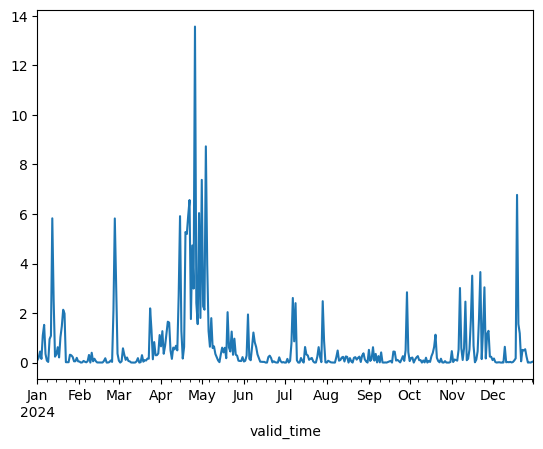

In [304]:
df_nairobi["nairobi_rain_2024_mm"].plot()

We will meed 3 more colums for our model, {lag, 3 day cumulative, and wet days}. These will be our features in the model that will help in predicting the rainfall

In [305]:
df_nairobi["lag_yesterday"] = df_nairobi["nairobi_rain_2024_mm"].shift(1)
df_nairobi["3_days_cumulative"] = df_nairobi["nairobi_rain_2024_mm"].rolling(3).sum()
df_nairobi["wet_day"] = (df_nairobi["nairobi_rain_2024_mm"] >1).astype("int64")

df_nairobi.head(20)

,number,latitude,longitude,nairobi_rain_2024_mm,lag_yesterday,3_days_cumulative,wet_day
valid_time,,,,,,,
2024-01-01,0,-1.25,36.75,0.095844,NaN,NaN,0
2024-01-02,0,-1.25,36.75,0.200272,0.095844,NaN,0
2024-01-03,0,-1.25,36.75,0.448704,0.200272,0.744820,0
2024-01-04,0,-1.25,36.75,0.148773,0.448704,0.797749,0
2024-01-05,0,-1.25,36.75,1.095295,0.148773,1.692772,1
2024-01-06,0,-1.25,36.75,1.523018,1.095295,2.767086,1
2024-01-07,0,-1.25,36.75,0.349998,1.523018,2.968311,0
2024-01-08,0,-1.25,36.75,0.077248,0.349998,1.950264,0
2024-01-09,0,-1.25,36.75,0.026226,0.077248,0.453472,0


In [306]:
df_nairobi = df_nairobi.dropna()

In [307]:
df_nairobi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2024-01-03 to 2024-12-31
Freq: D
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number                364 non-null    int64  
 1   latitude              364 non-null    float64
 2   longitude             364 non-null    float64
 3   nairobi_rain_2024_mm  364 non-null    float32
 4   lag_yesterday         364 non-null    float32
 5   3_days_cumulative     364 non-null    float64
 6   wet_day               364 non-null    int64  
dtypes: float32(2), float64(3), int64(2)
memory usage: 19.9 KB


In [308]:
df_nairobi.describe()

,number,latitude,longitude,nairobi_rain_2024_mm,lag_yesterday,3_days_cumulative,wet_day
count,364.0,364.00,364.00,364.000000,364.000000,364.000000,364.000000
mean,0.0,-1.25,36.75,0.664099,0.664521,1.993330,0.173077
std,0.0,0.00,0.00,1.426773,1.426613,3.369666,0.378834
min,0.0,-1.25,36.75,0.000000,0.000000,0.000477,0.000000
25%,0.0,-1.25,36.75,0.027657,0.027657,0.235200,0.000000
50%,0.0,-1.25,36.75,0.165462,0.168800,0.623226,0.000000
75%,0.0,-1.25,36.75,0.583529,0.583529,2.286196,0.000000
max,0.0,-1.25,36.75,13.569832,13.569832,21.289349,1.000000


Our  model need input and output fetures ...
input [lag_yesterday, 3_day_cumulative, wet_day]  == These features acts as atmospheric memory, moisture persistence and rain onset wich will be use to forecast amount of rainfall output feature[nairobi_rain_2024_mm] 

so we need X and Y 
x = input
y = output

Then slipt the data into 80 > Training and 20  > Testing 

In [309]:
x  = df_nairobi[["lag_yesterday", "3_days_cumulative", "wet_day"]]
y = df_nairobi["nairobi_rain_2024_mm"]

In [310]:
split_index = int(len(x) * 0.7)

x_train = x.iloc[:split_index]
x_test = x.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [311]:
print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(254, 3) (110, 3)
(254,) (110,)


For model and machine learning, we will use sklearn library -- linear regression model to predict 

In [312]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit (x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [313]:
y_predicted = model.predict(x_test)

Model Evaluation using MAE 

In [314]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predicted)

print("MAE (mm):", mae)

MAE (mm): 0.26994199292596954


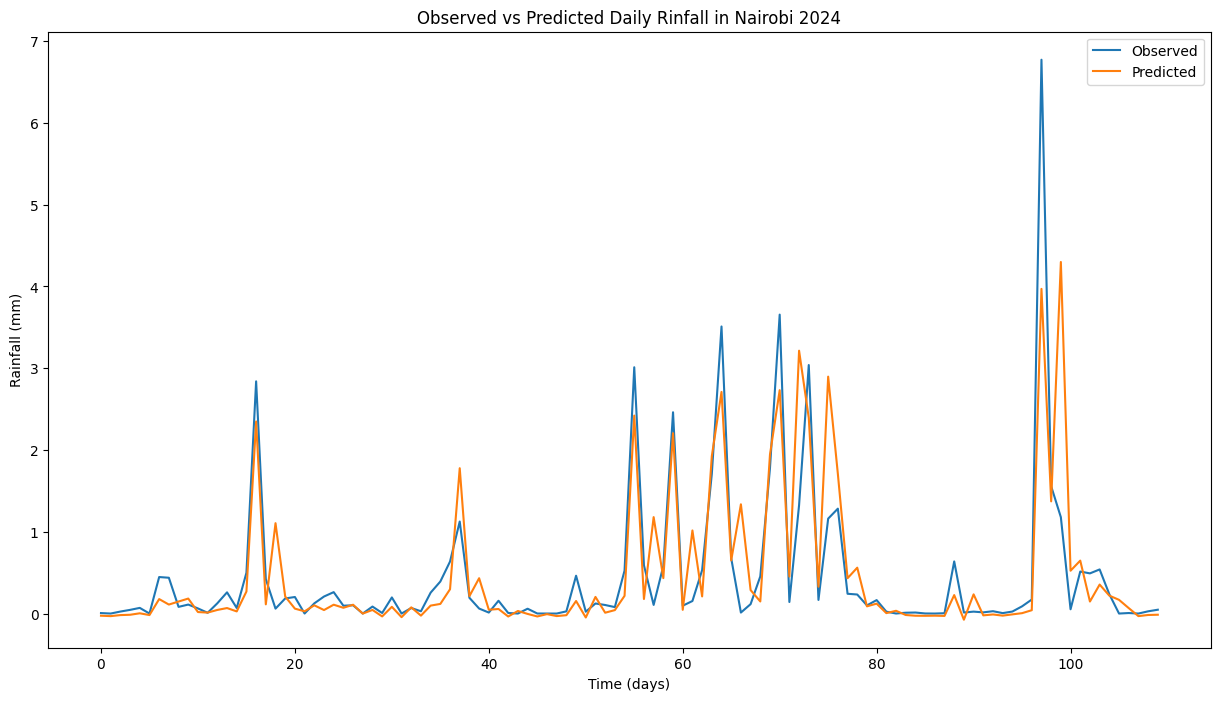

In [315]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,8))
plt.plot (y_test.values, label="Observed")
plt.plot (y_predicted, label = "Predicted")
plt.legend()
plt.title ("Observed vs Predicted Daily Rinfall in Nairobi 2024")
plt.ylabel("Rainfall (mm)")
plt.xlabel("Time (days)")
plt.show()

1. DRY SPELLS (Most of the year)
        Notice long stretches where:
            Observed ≈ 0 mm
            Predicted ≈ 0 mm

        Interpretation:
    ✔ The model correctly identifies dry conditions ✔ Wet-day indicator + lag features are working ✔ No false rainfall alarms
        This is very important in operational forecasting.


2. LIGHT–MODERATE RAIN EVENTS (1–3 mm)
        Example areas:
            Days ~18–40
            Days ~52–55

    What we see:
        Peaks are well timed
        Magnitudes are close
        Slight under/overestimation

    Meteorological meaning:
        Rainfall persistence is captured
        Moisture memory (lag + cumulative rain) is effective
        Model understands wet regimes


3.  HEAVY / EXTREME EVENTS (Key Learning)
        Look at the biggest spike (~day 60):
            Observed ≈ 6.8 mm
            Predicted ≈ 4 mm

    Meteorological interpretation:
        ✔ Model detects the event but the Model underestimates intensity

            This is expected and correct behavior for:
                Linear regression
                Limited predictors (rain-only memory)
                No atmospheric dynamics (winds, CAPE, humidity)

'''
    Why this happens physically:
    Extreme rainfall depends on:
    Deep convection
    Moisture convergence
    Vertical motion

'''



The model skillfully captures rainfall persistence and wet/dry regimes over Nairobi, with low average error (~0.3 mm). While timing of rainfall events is well represented, heavy precipitation magnitudes are underestimated, reflecting the absence of atmospheric dynamical predictors. The model is therefore suitable for daily rainfall tendency forecasting but not for extreme event intensity.”